## Make MorphoGraph

In [1]:
import igraph as ig
import pickle

In [2]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [15]:
with open("../data/asbc5_words.pkl", "rb") as fin:
    words = pickle.load(fin)

In [16]:
freqs = np.array(list(map(lambda x: x[1], filter(lambda x: len(x[0])==2, words.items()))))
freqs.sort()
freqs = freqs[::-1]

In [17]:
from matplotlib import pyplot as plt

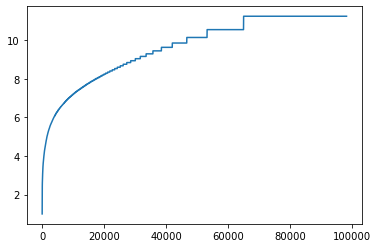

In [21]:
minF = np.min(-np.log(freqs))
def trans_freq(x):
    return -np.log(x)-minF+1
plt.plot(trans_freq(freqs))

In [22]:
from itertools import islice
mG = ig.Graph(directed=True)
edges = []
weights = []
node_set = set()
for w in tqdm(words.keys()):
    if len(w) != 2 or w[0]==w[1]: continue    
    if w[0] not in node_set:
        mG.add_vertex(w[0])
        node_set.add(w[0])
    if w[1] not in node_set:
        mG.add_vertex(w[1])
        node_set.add(w[1])
    edges.append((w[0], w[1]))
    weights.append(trans_freq(words[w]))
    
mG.add_edges(edges, {"weight": weights})

In [23]:
mG.summary()

'IGRAPH DNW- 6131 96935 -- \n+ attr: name (v), weight (e)'

In [24]:
compo_sizes = [len(x) for x in mG.components(mode="weak")]

In [25]:
np.unique(compo_sizes, return_counts=True)

(array([   2,    3,    4, 6003]), array([57,  2,  2,  1], dtype=int64))

In [26]:
words = {}
for compos in mG.components("weak"):    
    if len(compos) > 10: continue
    xG = mG.induced_subgraph(compos)    
    for e in xG.es:
        w = list(map(lambda x: xG.vs[x]["name"], [e.source, e.target]))
        words.setdefault(len(compos), []).append("".join(w))        
words

{2: ['嘧啶',
  '躊躇',
  '蹣跚',
  '蟋蟀',
  '蝌蚪',
  '酩酊',
  '踉蹌',
  '蹌踉',
  '嶙峋',
  '躑躅',
  '瞽瞍',
  '佝僂',
  '疙瘩',
  '憔悴',
  '檸檬',
  '妊娠',
  '篳篥',
  '箜篌',
  '玳瑁',
  '忐忑',
  '囹圄',
  '／＊',
  '傀儡',
  '枇杷',
  '惺忪',
  '嚅囁',
  '囁嚅',
  '醍醐',
  '袈裟',
  '齷齪',
  '妯娌',
  '蜈蚣',
  '蝤蠐',
  '耄耋',
  '囫圇',
  '倥傯',
  '餛飩',
  '鞦韆',
  '鵪鶉',
  '鷓鴣',
  '鸕鶿',
  '鵜鶘',
  '顢頇',
  '踟躕',
  '呶嘵',
  '趑趄',
  '嘿咻',
  '窸窣',
  '蛞蝓',
  '邯鄲',
  '犰狳',
  '蠑螈',
  '蒟蒻',
  '糌粑',
  '蠨蛸',
  '硨磲',
  '鵂鶹',
  '彳亍',
  '苜蓿'],
 3: ['蹂躪', '蹂躝', 'ㄉㄟ', 'ㄉㄡ'],
 4: ['齟齬', '齟鋙', '鉏鋙', '迤邐', '邐迤', '逶迤', '迆邐']}

In [27]:
with open("../data/morpho_graph.pkl", "wb") as fout:
    pickle.dump(mG, fout)